# Data Pre-processing

In [1]:
#Jait Purohit

import sklearn.feature_extraction.text as sk_text
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from pandas import Series
%matplotlib inline
import json
import csv
import pandas as pd
import keras
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv1D, MaxPooling1D
import time
import seaborn as sns
sns.set_style('whitegrid')
import numpy as np
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
import time
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels
import matplotlib.pyplot as plt
import matplotlib
import pickle
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

Using TensorFlow backend.


In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
train_data.head(60)

,'BS 1','BS 2','BS 3','BS 4','BS 5','BS 6','BS 7','BS 8','BS 9','BS 10',...,'BS 64','BS 65','BS 66','BS 67','BS 68',Time,'SF','HDOP',Latitude,Longitude
0,-200,-200,-200,-200,-200,-200,-200,-200,-114,-200,...,-200,-200,-200,-200,-200,'2017-12-28T16:14:07.247000+00:00',12,1.02,51.216736,4.412130
1,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,...,-200,-200,-200,-200,-200,'2017-11-28T12:01:02.380000+00:00',7,0.57,51.232037,4.405185
2,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,...,-200,-200,-200,-200,-200,'2017-12-14T09:05:22.832000+00:00',9,1.00,51.202763,4.390477
3,-200,-100,-200,-200,-200,-200,-200,-200,-200,-113,...,-200,-200,-200,-200,-200,'2018-01-17T09:11:49.222000+00:00',12,0.62,51.194584,4.417887
4,-200,-106,-107,-200,-200,-200,-200,-200,-200,-200,...,-200,-200,-200,-200,-200,'2018-01-10T14:47:01.379000+00:00',12,1.00,51.207203,4.403470
5,-200,-200,-200,-200,-113,-200,-200,-200,-200,-200,...,-200,-200,-200,-200,-200,'2017-12-12T07:33:14.423000+00:00',9,0.71,51.226933,4.401772
6,-111,-108,-200,-200,-200,-200,-200,-200,-200,-200,...,-200,-200,-200,-200,-200,'2017-12-29T08:27:42.256000+00:00',12,0.65,51.205639,4.418255
7,-200,-200,-200,-200,-200,-200,-200,-200,-101,-200,...,-200,-200,-200,-200,-200,'2017-12-30T08:55:26.850000+00:00',12,0.60,51.220230,4.428709
8,-112,-200,-200,-200,-200,-200,-200,-200,-200,-90,...,-200,-200,-200,-200,-200,'2018-01-17T04:56:43.537000+00:00',12,0.69,51.194309,4.418217
9,-200,-200,-200,-200,-200,-200,-200,-200,-120,-200,...,-200,-200,-200,-200,-200,'2018-01-17T08:51:37.140000+00:00',12,1.05,51.217331,4.428557


In [4]:
def histNONA(df, col):
    print(df[col].describe())
    plt.hist(list(filter(lambda x: not math.isnan(x), list(df[col]))), facecolor='green', edgecolor = "black")
    plt.show()
def distribution(df, col, replace):
    #Underlying Normal Distribution
    newvalues = df[col].fillna(replace)
    x = np.log(np.array(newvalues))

    plt.hist(x, facecolor = "green", edgecolor = "black")
    plt.show()
    counts, start, dx, _ = scipy.stats.cumfreq(x, numbins=20)
    pp = np.arange(counts.size) * dx + start
    plt.plot(pp, counts, 'ro')
    plt.show()
    return x
def update(df, col, x):
    missing = df[col].isna().sum()
    missignVals = np.random.lognormal(np.mean(x), np.std(x), missing)
    enrolls =list(df[col])
    newenrolls = []
    i = 0
    for enroll in enrolls:
        if math.isnan(enroll):
            newenrolls.append(missignVals[i])
            i += 1
        else:
            newenrolls.append(enroll)
    df[col] = newenrolls
def post(df, col):
    print(df[col].describe())
    plt.hist(df[col], facecolor='green', edgecolor = "black")
    plt.show() 
    x = np.log(np.array(df[col]))
    plt.hist(x, facecolor = "green", edgecolor = "black")
    plt.show()

ModuleNotFoundError: No module named 'shapely'

In [5]:
# importing libraries
import pandas as pd # Reading csv file 
from shapely.geometry import Point # Shapely for converting latitude/longtitude to geometry
import geopandas as gpd # To create GeodataFrame

ModuleNotFoundError: No module named 'shapely'

count    90515.000000
mean        10.274949
std          1.686280
min          7.000000
25%          9.000000
50%         11.000000
75%         12.000000
max         12.000000
Name: 'SF', dtype: float64


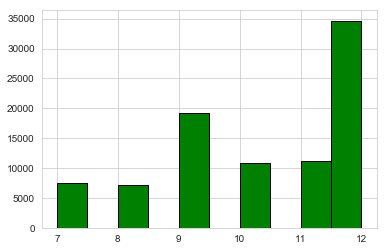

In [8]:
histNONA(train_data, "'SF'")

count    90515.000000
mean         0.792437
std          0.742089
min          0.510000
25%          0.650000
50%          0.710000
75%          0.820000
max         99.989998
Name: 'HDOP', dtype: float64


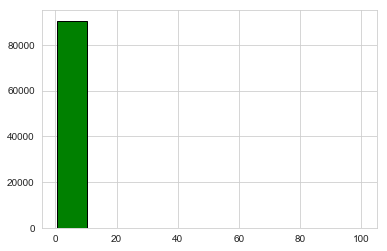

In [6]:
histNONA(train_data, "'HDOP'")

count    90515.000000
mean      -179.303066
std         38.315835
min       -200.000000
25%       -200.000000
50%       -200.000000
75%       -200.000000
max        -58.000000
Name: 'BS 1', dtype: float64


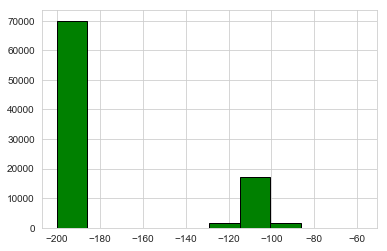

In [7]:
histNONA(train_data, "'BS 1'")

In [8]:
test_data.head()

,'BS 1','BS 2','BS 3','BS 4','BS 5','BS 6','BS 7','BS 8','BS 9','BS 10',...,'BS 64','BS 65','BS 66','BS 67','BS 68',Time,'SF','HDOP',Latitude,Longitude
0,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,...,-200,-200,-200,-200,-200,'2018-02-02T08:07:18.703000+00:00',7,0.75,51.218407,4.406668
1,-200,-101,-200,-200,-200,-200,-200,-200,-200,-84,...,-200,-200,-200,-200,-200,'2018-01-13T19:22:46.571000+00:00',12,0.65,51.194256,4.418403
2,-200,-200,-200,-200,-200,-200,-200,-200,-102,-200,...,-200,-200,-200,-200,-200,'2018-02-05T07:44:19.142000+00:00',7,0.65,51.228786,4.413428
3,-200,-200,-200,-102,-103,-200,-200,-200,-200,-200,...,-200,-200,-200,-200,-200,'2018-01-08T22:03:34.349000+00:00',7,1.35,51.229507,4.416594
4,-200,-200,-200,-115,-200,-200,-106,-200,-111,-200,...,-200,-200,-200,-200,-200,'2018-01-27T07:49:08.464000+00:00',10,0.65,51.220341,4.448977


In [9]:
train_data.describe()

,'BS 1','BS 2','BS 3','BS 4','BS 5','BS 6','BS 7','BS 8','BS 9','BS 10',...,'BS 63','BS 64','BS 65','BS 66','BS 67','BS 68','SF','HDOP',Latitude,Longitude
count,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,...,90515.000000,90515.000000,90515.0,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000,90515.000000
mean,-179.303066,-170.813059,-191.315881,-194.792841,-187.650876,-197.607148,-193.240369,-197.692493,-180.996100,-183.771408,...,-199.998862,-199.999061,-200.0,-199.994156,-199.999061,-199.999094,10.274949,0.792437,51.213483,4.414083
std,38.315835,44.906299,27.392112,21.226694,32.152025,14.534820,23.993144,14.466146,37.724607,37.759828,...,0.342355,0.282526,0.0,0.788951,0.282526,0.272555,1.686280,0.742089,0.013153,0.015150
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,...,-200.000000,-200.000000,-200.0,-200.000000,-200.000000,-200.000000,7.000000,0.510000,51.186169,4.325181
25%,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,...,-200.000000,-200.000000,-200.0,-200.000000,-200.000000,-200.000000,9.000000,0.650000,51.202433,4.405616
50%,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,...,-200.000000,-200.000000,-200.0,-200.000000,-200.000000,-200.000000,11.000000,0.710000,51.213924,4.416012
75%,-200.000000,-108.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,...,-200.000000,-200.000000,-200.0,-200.000000,-200.000000,-200.000000,12.000000,0.820000,51.225872,4.419827
max,-58.000000,-67.000000,-76.000000,-79.000000,-76.000000,-85.000000,-66.000000,-74.000000,-60.000000,-64.000000,...,-97.000000,-115.000000,-200.0,-79.000000,-115.000000,-118.000000,12.000000,99.989998,51.236019,4.459762


In [10]:
train_data.drop(columns=['Time'],inplace=True)
test_data.drop(columns=['Time'],inplace=True)

# Split Training and Testing data

In [11]:
traincols = train_data.columns.tolist() 
traincols.remove('Latitude')
traincols.remove('Longitude')
len(traincols)

70

In [12]:
columns_X = traincols
X = train_data[columns_X]
columns_y = ['Latitude', 'Longitude']
y = train_data[columns_y]

In [18]:
y['Latitude'] = y['Latitude'].astype(float)
y['Longitude'] = y['Longitude'].astype(float)

In [27]:
y['Latitude'].dtype
y['Longitude'].dtype

dtype('float64')

In [20]:
import folium
mapit = None
#latlon = [ (51.249443914705175, -0.13878830247011467), (51.249443914705175, -0.13878830247011467), (51.249768239976866, -2.8610415615063034)]
for coord in y:
    mapit = folium.Map( location=[ coord[0], coord[1] ] )

mapit.save( 'map.html')

ValueError: Location should consist of two numerical values, but 'L' of type <class 'str'> is not convertible to float.

In [15]:
X.head()

,'BS 1','BS 2','BS 3','BS 4','BS 5','BS 6','BS 7','BS 8','BS 9','BS 10',...,'BS 61','BS 62','BS 63','BS 64','BS 65','BS 66','BS 67','BS 68','SF','HDOP'
0,-200,-200,-200,-200,-200,-200,-200,-200,-114,-200,...,-200,-200,-200,-200,-200,-200,-200,-200,12,1.02
1,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,...,-200,-200,-200,-200,-200,-200,-200,-200,7,0.57
2,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,...,-200,-200,-200,-200,-200,-200,-200,-200,9,1.00
3,-200,-100,-200,-200,-200,-200,-200,-200,-200,-113,...,-200,-200,-200,-200,-200,-200,-200,-200,12,0.62
4,-200,-106,-107,-200,-200,-200,-200,-200,-200,-200,...,-200,-200,-200,-200,-200,-200,-200,-200,12,1.00


In [16]:
y.head()

,Latitude,Longitude
0,51.216736,4.412130
1,51.232037,4.405185
2,51.202763,4.390477
3,51.194584,4.417887
4,51.207203,4.403470


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
print ('X: ({}, {})'.format(*X.shape))
print ('y: ({}, {})'.format(*y.shape))
print ('X_train: ({}, {})'.format(*X_train.shape))
print ('y_train: ({}, {})'.format(*y_train.shape))
print ('X_test: ({}, {})'.format(*X_test.shape))
print ('y_test: ({}, {})'.format(*y_test.shape))

X: (90515, 70)
y: (90515, 2)
X_train: (72412, 70)
y_train: (72412, 2)
X_test: (18103, 70)
y_test: (18103, 2)


In [19]:
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix
def print_report(y_pred,y_true):
    print("Accuracy: ", metrics.accuracy_score(y_true,y_pred))
    print("Precision: ", metrics.precision_score(y_true,y_pred, pos_label=1, average='weighted'))
    print("Recall: ", metrics.recall_score(y_true,y_pred, pos_label=1, average='weighted'))
    print("F1_Score: ", metrics.f1_score(y_true,y_pred, pos_label=1, average='weighted'))
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    outcome = encode_text_index(train_data, y)
    print('Plotting confusion matrix')
    plt.figure()
    plot_confusion_matrix(cm, outcome)
    plt.show()
    print(classification_report(y_true, y_pred))

# Model Classifiers

In [21]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

Grid Search Cross Validation¶
Grid Search CV implements an exhaustive search over specified parameter values for an estimator. Important members are fit, predict.

It iterates through a dictionary of hyper parameters and choose the combination that better fits the model.

In [22]:
# Funtion for cross-validation over a grid of parameters

def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)
    print ("BEST", gs.best_params_, gs.best_score_, gs.cv_results_)
    best = gs.best_estimator_
    return best

# KNN

In [23]:
# Create a k-Nearest Neighbors Regression estimator
knn_estimator = KNeighborsRegressor()
knn_parameters = {"n_neighbors": [1,2,5]}
knn_best = cv_optimize(knn_estimator, knn_parameters, X_train, y_train, score_func='neg_mean_squared_error')

BEST {'n_neighbors': 5} -2.6473660560146975e-05 {'mean_fit_time': array([7.38616796, 5.98333097, 5.63312726]), 'std_fit_time': array([2.00629116, 0.87003981, 0.19969721]), 'mean_score_time': array([28.01345959, 22.98255429, 25.94411407]), 'std_score_time': array([6.10548807, 0.94689721, 1.06091424]), 'param_n_neighbors': masked_array(data=[1, 2, 5],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_neighbors': 1}, {'n_neighbors': 2}, {'n_neighbors': 5}], 'split0_test_score': array([-4.16816933e-05, -3.27447084e-05, -2.74208316e-05]), 'split1_test_score': array([-3.94660947e-05, -3.05465490e-05, -2.59010883e-05]), 'split2_test_score': array([-3.93759255e-05, -3.07789745e-05, -2.67007687e-05]), 'split3_test_score': array([-3.97362237e-05, -3.05506597e-05, -2.60600955e-05]), 'split4_test_score': array([-4.18817833e-05, -3.11376372e-05, -2.62854928e-05]), 'mean_test_score': array([-4.04283481e-05, -3.11517194e-05, -2.64736606e-05]), '

In [24]:
knn_reg=knn_best.fit(X_train, y_train)
knn_training_accuracy = knn_reg.score(X_train, y_train)
knn_test_accuracy = knn_reg.score(X_test, y_test)
print ("############# based on standard predict ################")
print ("R^2 on training data: %0.8f" % (knn_training_accuracy))
print ("R^2 on test data:     %0.8f" % (knn_test_accuracy))

############# based on standard predict ################
R^2 on training data: 0.91517239
R^2 on test data:     0.86984413


In [65]:
# Calculate the Root Mean Squared Error
RSME = np.sqrt(mean_squared_error(knn_reg.predict(X_test),y_test))

In [67]:
print(RSME)

0.005131992867268826


In [26]:
sampleValue = pd.DataFrame(train_data, columns=(columns_X + columns_y))
sampleValue = sampleValue.sample(10)
sampleValue

,'BS 1','BS 2','BS 3','BS 4','BS 5','BS 6','BS 7','BS 8','BS 9','BS 10',...,'BS 63','BS 64','BS 65','BS 66','BS 67','BS 68','SF','HDOP',Latitude,Longitude
33884,-200,-200,-200,-200,-200,-200,-200,-200,-113,-200,...,-200,-200,-200,-200,-200,-200,12,1.20,51.213985,4.418750
20177,-200,-200,-200,-200,-88,-200,-200,-200,-200,-200,...,-200,-200,-200,-200,-200,-200,9,0.57,51.229870,4.402423
18991,-200,-200,-200,-200,-200,-200,-200,-200,-112,-200,...,-200,-200,-200,-200,-200,-200,10,0.78,51.212246,4.426115
45765,-102,-98,-200,-200,-200,-200,-113,-200,-200,-200,...,-200,-200,-200,-200,-200,-200,9,0.60,51.206085,4.418159
36650,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,...,-200,-200,-200,-200,-200,-200,9,0.83,51.217007,4.394195
85475,-200,-103,-200,-200,-200,-200,-200,-200,-200,-116,...,-200,-200,-200,-200,-200,-200,12,0.65,51.201370,4.417138
11119,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,...,-200,-200,-200,-200,-200,-200,11,0.72,51.225147,4.409872
35858,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,...,-200,-200,-200,-200,-200,-200,10,0.77,51.218800,4.404345
22689,-200,-200,-200,-200,-100,-92,-200,-200,-200,-200,...,-200,-200,-200,-200,-200,-200,12,0.58,51.233395,4.409118
80978,-200,-200,-200,-200,-200,-200,-111,-200,-200,-200,...,-200,-200,-200,-200,-200,-200,12,0.70,51.223087,4.436789


In [27]:
y_pred = knn_reg.predict(sampleValue.iloc[:,:-2])
y_pred

array([[51.21445999,  4.41872273],
       [51.22988968,  4.40241528],
       [51.21212921,  4.42568607],
       [51.20264587,  4.42416945],
       [51.21142731,  4.38001728],
       [51.19777221,  4.41813965],
       [51.22577515,  4.41027041],
       [51.22499848,  4.40499992],
       [51.23321609,  4.40564032],
       [51.22942505,  4.43196373]])

In [35]:
y_pred.shape

(10, 2)

In [28]:
# Save the model
from sklearn.externals import joblib
joblib.dump(knn_reg, 'knn_model.pkl')

['knn_model.pkl']

# Load saved model to predict Test Data

In [38]:
#Loading the saved model with joblib
pipe = joblib.load('knn_model.pkl')

# New data to predict
test_data = pd.read_csv('test.csv')
test_data.drop(columns=['Time'],inplace=True)
pred_cols = list(test_data.columns.values)[:-2]

# apply the whole pipeline to data
pred = pd.DataFrame(pipe.predict(test_data[pred_cols]))
pred

,0,1
0,51.225313,4.410655
1,51.195352,4.417139
2,51.224946,4.415119
3,51.232166,4.417954
4,51.227679,4.438164
5,51.194305,4.418397
6,51.229111,4.438205
7,51.219248,4.402025
8,51.202372,4.408322
9,51.218806,4.416096


In [43]:
test_y_actual=test_data[['Latitude', 'Longitude']]
test_y_actual.head()

,Latitude,Longitude
0,51.218407,4.406668
1,51.194256,4.418403
2,51.228786,4.413428
3,51.229507,4.416594
4,51.220341,4.448977


In [44]:
test_y_actual.shape

(33013, 2)

# Calculating the Euclidean distance

In [45]:
test_y_actual['distance'] = test_y_actual[['Latitude', 'Longitude']].sub(np.array(pred)).pow(2).sum(1).pow(0.5)

In [50]:
test_y_actual.shape

(33013, 3)

In [48]:
test_y_actual.head(10)

,Latitude,Longitude,distance
0,51.218407,4.406668,0.007974
1,51.194256,4.418403,0.001673
2,51.228786,4.413428,0.004196
3,51.229507,4.416594,0.002986
4,51.220341,4.448977,0.013068
5,51.194382,4.418537,0.000160
6,51.228378,4.439435,0.001432
7,51.217495,4.400462,0.002349
8,51.200665,4.411805,0.003879
9,51.219929,4.415290,0.001382


In [62]:
test_y_actual["distance"].mean()

0.0047719260112285555

In [52]:
cols = list(test_y_actual.columns)[2:]

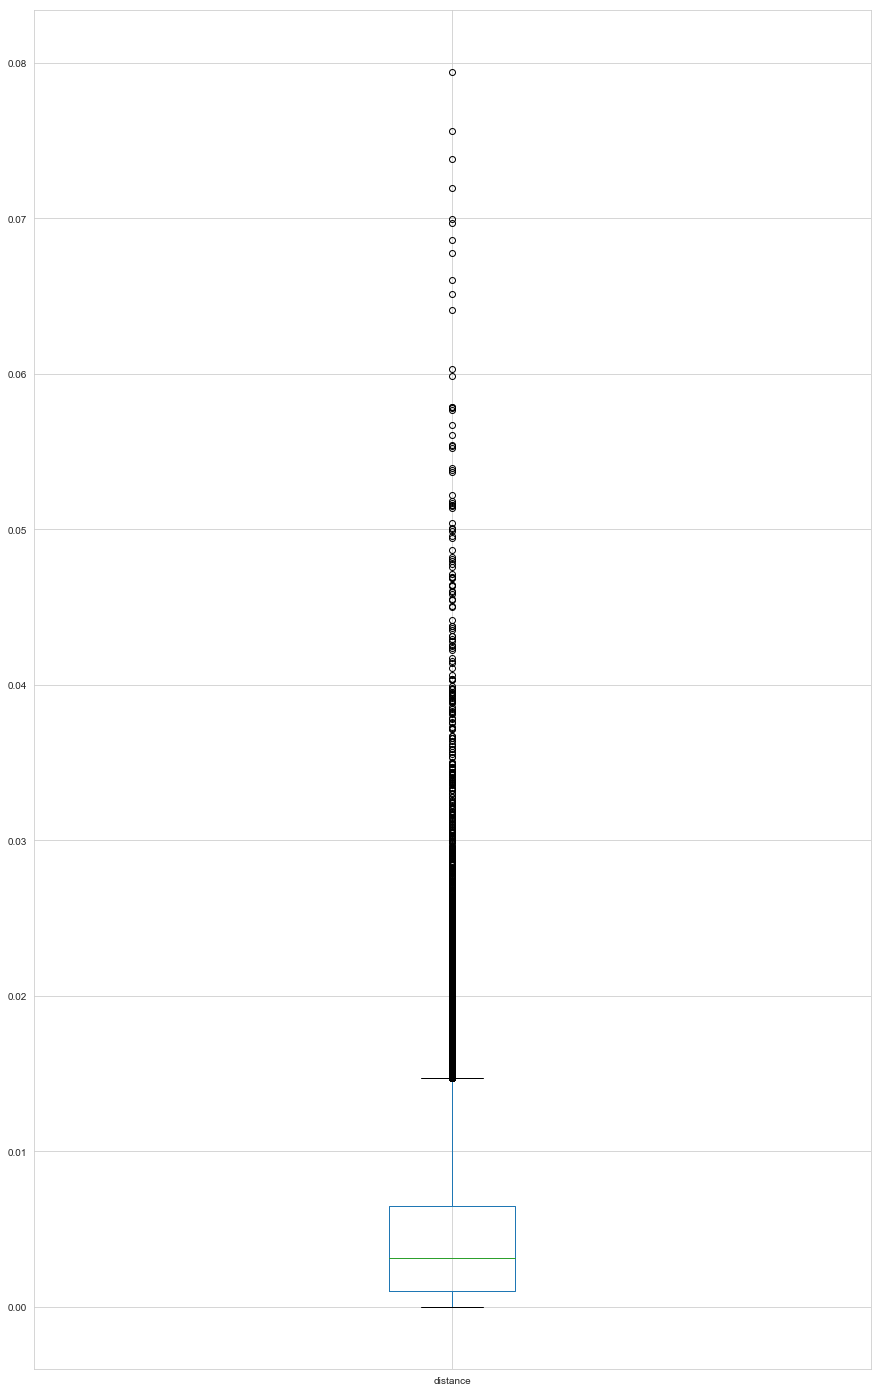

In [61]:
test_y_actual[cols].boxplot(figsize = (15, 25))